In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px


In [ ]:
df = pd.read_csv('/content/cars_ds_final.csv')

In [ ]:
df.sample(8)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,...,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
810,810,NaN,Mercedes-Benz V-Class,Exclusive Lwb,"Rs. 81,90,000",2143 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,93 litres,Diesel,1880 mm,5140 mm,1928 mm,MUV,5.0,...,Cup Holders,Yes,Yes,Yes,2.4 PSI,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
342,342,Lamborghini,Urus,V8,"Rs. 3,00,00,000",3996 cc,8.0,8.0,AWD (All Wheel Drive),V,BS IV,NaN,Injection,75 litres,Petrol,1638 mm,5112 mm,2181 mm,SUV,5.0,...,Audio Controls,Yes,Yes,Yes,NaN,Yes,NaN,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1060,1060,Maruti Suzuki,Alto 800 Tour,H1 (O),"Rs. 3,56,559",796 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,35 litres,Petrol,1475 mm,3395 mm,1490 mm,Hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,445,Icml,Extreme,Ld Crdfi Ps Ac 9 Seater Bsiv,"Rs. 6,28,072",1994 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",Injection,50 litres,Diesel,1885 mm,4440 mm,NaN,SUV,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930,930,Maruti Suzuki,Ertiga,Zxi,"Rs. 9,17,000",1462 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,45 litres,Petrol,1685 mm,4265 mm,1695 mm,MPV,5.0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,665,Skoda,Monte Carlo,Monte Carlo 1.6 Mpi Mt,"Rs. 11,39,599",1598 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,55 litres,Petrol,1466 mm,4413 mm,1699 mm,Sedan,4.0,...,Yes,NaN,Yes,Yes,NaN,NaN,NaN,Yes,Yes,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
669,669,Mahindra,Xuv500,W9,"Rs. 15,88,943",2179 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,70 litres,Diesel,1785 mm,4585 mm,1890 mm,SUV,5.0,...,Yes,Yes,Yes,Yes,NaN,NaN,Yes,NaN,Yes,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
828,828,Land Rover Rover,Range Sport,2.0L S Petrol,"Rs. 86,70,586",1997 cc,8.0,NaN,4WD,V,BS IV,"Front, Longitudinal",Injection,105 litres,Petrol,1803 mm,4879 mm,2220 mm,SUV,5.0,...,Yes,Yes,Yes,NaN,NaN,Only front,Yes,Yes,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(1276, 141)

In [ ]:
df.isnull().sum()

Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

1. Understand Dataset:
 Get a sense of the dataset structure, including the number of rows and columns.


In [ ]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

2. Data Cleaning:
Handle missing values, if any, by either removing or imputing them based on the nature of the data.


In [ ]:
#Creating a New Column 'car':
df['car'] = df.Make + ' ' + df.Model


#Selecting Columns
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']


#Copying the DataFrame:
df_full = df.copy()

#Cleaning 'Ex-Showroom_Price':
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df = df[c]


#Filtering Rows:
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]


#Cleaning Numeric Columns:
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)

# Handling Special Cases
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)

#Filling Missing Values:
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)


#Cleaning 'Power' and 'Torque':
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP


#Cleaning 'Power' and 'Torque':
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)


#Renaming Columns:
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

In [ ]:
df.sample(6)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
937,Maruti Suzuki,Ertiga,Maruti Suzuki Ertiga,1.5L Zdi Plus,MPV,Diesel,Injection,Manual,FWD (Front Wheel Drive),1498,4,24.20,93.70,225,45.0,1690.0,4395.0,1735.0,5,7,2740.0,2,15689
982,Kia,Seltos,Kia Seltos,Gtx At 1.4,SUV,Petrol,Injection,DCT,FWD (Front Wheel Drive),1353,4,16.50,138.08,242,50.0,1645.0,4315.0,1800.0,5,5,2610.0,4,22806
1123,Hyundai,Creta,Hyundai Creta,1.6 Vtvt Sx Dual Tone,SUV,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1591,4,15.29,121.32,151,55.0,1630.0,4270.0,1780.0,5,5,2590.0,2,18018
1266,Honda,City,Honda City,V Mt Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1497,4,17.80,117.37,145,40.0,1495.0,4440.0,1695.0,4,5,2600.0,2,14922
773,Skoda,Kodiaq Scout,Skoda Kodiaq Scout,2.0 Tdi At,SUV,Diesel,Injection,Automatic,4WD,1968,4,16.25,145.98,340,63.0,1665.0,4697.0,1882.0,5,7,2791.0,9,47586
1106,Skoda,Rapid,Skoda Rapid,1.5 Tdi Cr Ambition,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1498,4,21.13,108.50,250,55.0,1466.0,4413.0,1699.0,4,5,2552.0,2,15814


In [ ]:
df.isnull().sum()

make            0
model           0
car             0
variant         0
body_type       0
fuel_type       0
fuel_system     1
type            0
drivetrain      1
displacement    0
cylinders       0
mileage         0
power           0
torque          0
fuel_tank       0
height          0
length          0
width           0
doors           0
seats           0
wheelbase       0
airbags         0
price           0
dtype: int64

3. Data Types:
Check the data types of each column. Ensure they are appropriate for the analysis.


In [ ]:
# Check the data types of each column
print(df.dtypes)


make             object
model            object
car              object
variant          object
body_type        object
fuel_type        object
fuel_system      object
type             object
drivetrain       object
displacement      int64
cylinders         int64
mileage         float64
power           float64
torque            int64
fuel_tank       float64
height          float64
length          float64
width           float64
doors             int64
seats             int64
wheelbase       float64
airbags           int64
price             int64
dtype: object


In [ ]:
# Convert multiple columns to different data types
df['mileage'] = df['mileage'].astype(int)

5. Histograms:
Create histograms to visualize the distribution of key numeric variables (e.g., sales, price).


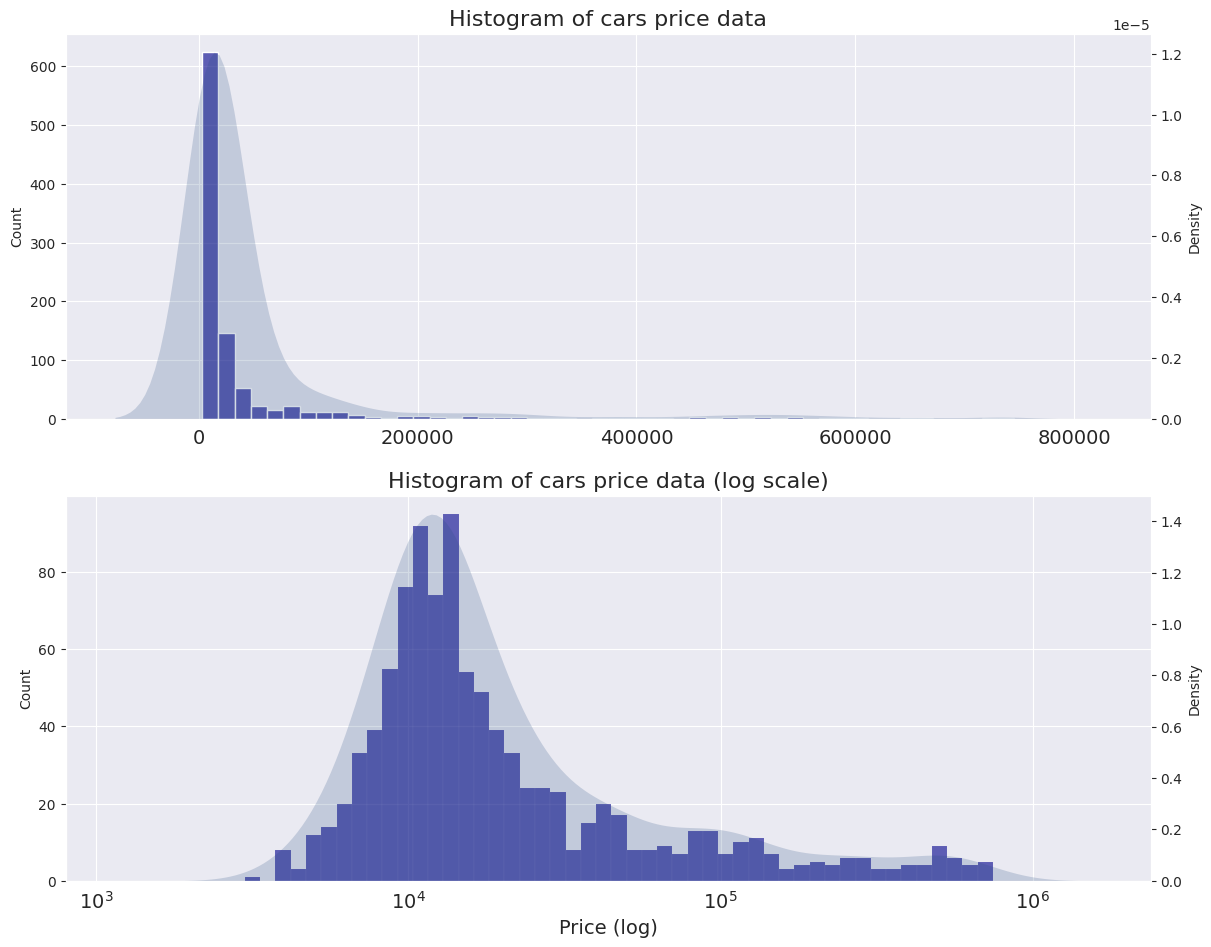

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

In [ ]:
df[df.make=='Nissan']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
101,Nissan,Micra Active,Nissan Micra Active,Xl,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1198,3,18,67.07,104,41.0,1530.0,3801.0,1665.0,5,5,2450.0,2,7350
102,Nissan,Micra Active,Nissan Micra Active,Xv,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1198,3,19,67.07,104,41.0,1530.0,3801.0,1665.0,5,5,2450.0,2,8399
103,Nissan,Micra Active,Nissan Micra Active,Xl (O),Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1198,3,18,67.07,104,41.0,1530.0,3801.0,1665.0,5,5,2450.0,2,7883
922,Nissan,Sunny,Nissan Sunny,Xe Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1498,4,16,97.65,134,41.0,1515.0,4455.0,1695.0,4,5,2600.0,1,9898
923,Nissan,Sunny,Nissan Sunny,Xl Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1498,4,16,97.65,134,41.0,1515.0,4455.0,1695.0,4,5,2600.0,1,11710
924,Nissan,Sunny,Nissan Sunny,Xl Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1461,4,22,84.82,200,41.0,1515.0,4455.0,1695.0,4,5,2600.0,1,12775
925,Nissan,Sunny,Nissan Sunny,Xv Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1461,4,22,84.82,200,41.0,1515.0,4455.0,1695.0,4,5,2600.0,2,13915
926,Nissan,Sunny,Nissan Sunny,Xe Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1461,4,22,84.82,200,41.0,1515.0,4455.0,1695.0,4,5,2600.0,1,12053
927,Nissan,Sunny,Nissan Sunny,Xv Cvt,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1498,4,17,99.62,134,41.0,1515.0,4455.0,1695.0,4,5,2600.0,2,13915
928,Nissan,Sunny,Nissan Sunny,Special Edition Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1461,4,22,84.82,200,41.0,1515.0,4455.0,1695.0,4,5,2600.0,2,12281


In [ ]:
df[df.model =='Corolla Altis']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
734,Toyota,Corolla Altis,Toyota Corolla Altis,G Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,23030
735,Toyota,Corolla Altis,Toyota Corolla Altis,G At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,25284
736,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,4,16,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,26348
737,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,27104
738,Toyota,Corolla Altis,Toyota Corolla Altis,G Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,4,21,86.80,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,24794
739,Toyota,Corolla Altis,Toyota Corolla Altis,Vl At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,4,16,138.08,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,28266


In [ ]:
df[df.model =='Kwid']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
12,Renault,Kwid,Renault Kwid,Rxe 0.8,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799,3,25,53.26,72,28.0,1490.0,3731.0,1579.0,5,5,2422.0,1,4946
13,Renault,Kwid,Renault Kwid,Std 0.8,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799,3,25,53.26,72,28.0,1490.0,3731.0,1579.0,5,5,2442.0,1,3966
14,Renault,Kwid,Renault Kwid,Rxl 0.8,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799,3,25,53.26,72,28.0,1490.0,3731.0,1579.0,5,5,2422.0,1,5366
15,Renault,Kwid,Renault Kwid,Rxt 0.8,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799,3,25,53.26,72,28.0,1490.0,3731.0,1580.0,5,5,2422.0,1,5786
16,Renault,Kwid,Renault Kwid,Rxt 1.0,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),999,3,23,67.07,91,28.0,1490.0,3731.0,1579.0,5,5,2422.0,1,6066
17,Renault,Kwid,Renault Kwid,Climber 1.0 Mt,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),999,3,23,67.07,91,28.0,1490.0,3731.0,1579.0,5,5,2422.0,1,6362
18,Renault,Kwid,Renault Kwid,Rxt Amt 1.0,Hatchback,Petrol,Injection,Automatic,FWD (Front Wheel Drive),999,3,24,67.07,91,28.0,1490.0,3731.0,1579.0,5,5,2422.0,1,6486
19,Renault,Kwid,Renault Kwid,Climber Amt 1.0,Hatchback,Petrol,Injection,Automatic,FWD (Front Wheel Drive),999,3,24,67.07,91,28.0,1490.0,3731.0,1579.0,5,5,2422.0,1,6782
20,Renault,Kwid,Renault Kwid,Rxt (O) 1.0,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),999,3,23,67.07,91,28.0,1490.0,3731.0,1579.0,5,5,2422.0,2,6173
21,Renault,Kwid,Renault Kwid,Rxt (O) Amt 1.0,Hatchback,Petrol,Injection,Automatic,FWD (Front Wheel Drive),999,3,23,67.07,91,28.0,1490.0,3731.0,1579.0,5,5,2422.0,2,6593


6. Bar Charts:
Plot bar charts to represent the count of categorical variables (e.g., car models, manufacturers).


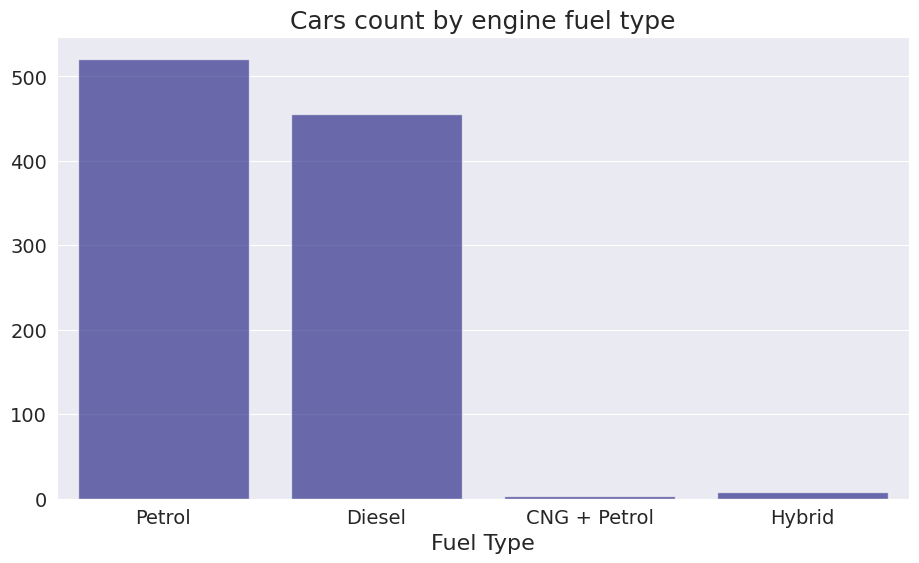

In [ ]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='fuel_type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

In [ ]:
# Calculate counts of car models
model_counts = df['model'].value_counts().reset_index()
model_counts.columns = ['model', 'count']

# Calculate counts of car manufacturers
make_counts = df['make'].value_counts().reset_index()
make_counts.columns = ['make', 'count']

# Display the counts
print("Counts of Car Models:")
print(model_counts)

print("\nCounts of Car Manufacturers:")
print(make_counts)

Counts of Car Models:
                 model  count
0                Nexon     24
1           Kuv100 Nxt     22
2               Xuv500     21
3              Compass     21
4                Amaze     20
..                 ...    ...
191              Prius      1
192  V90 Cross Country      1
193                Gtr      1
194            Vantage      1
195            Montero      1

[196 rows x 2 columns]

Counts of Car Manufacturers:
                make  count
0      Maruti Suzuki    143
1           Mahindra    101
2            Hyundai     97
3             Toyota     82
4               Tata     81
5              Honda     59
6              Skoda     43
7               Ford     42
8            Renault     35
9                Bmw     32
10            Nissan     29
11        Volkswagen     28
12              Jeep     28
13              Audi     22
14              Fiat     21
15            Jaguar     20
16            Datsun     15
17             Volvo     12
18       Lamborghini     12
19  

In [ ]:
import plotly.graph_objects as go

# Create traces for the bar charts
trace1 = go.Bar(x=model_counts['model'], y=model_counts['count'], name='Car Models')
trace2 = go.Bar(x=make_counts['make'], y=make_counts['count'], name='Manufacturers')

# Create a dropdown menu for switching between the bar charts
buttons = [
    {'label': 'Car Models', 'method': 'update', 'args': [{'visible': [True, False]}]},
    {'label': 'Manufacturers', 'method': 'update', 'args': [{'visible': [False, True]}]}
]

# Create the layout with dropdown menu
layout = go.Layout(
    title='Count of Car Models and Manufacturers',
    xaxis=dict(title='Car Model / Manufacturer'),
    yaxis=dict(title='Count'),
    updatemenus=[{'buttons': buttons, 'direction': 'down', 'showactive': True}]
)

# Create the figure with both bar charts
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the interactive plot
fig.show()


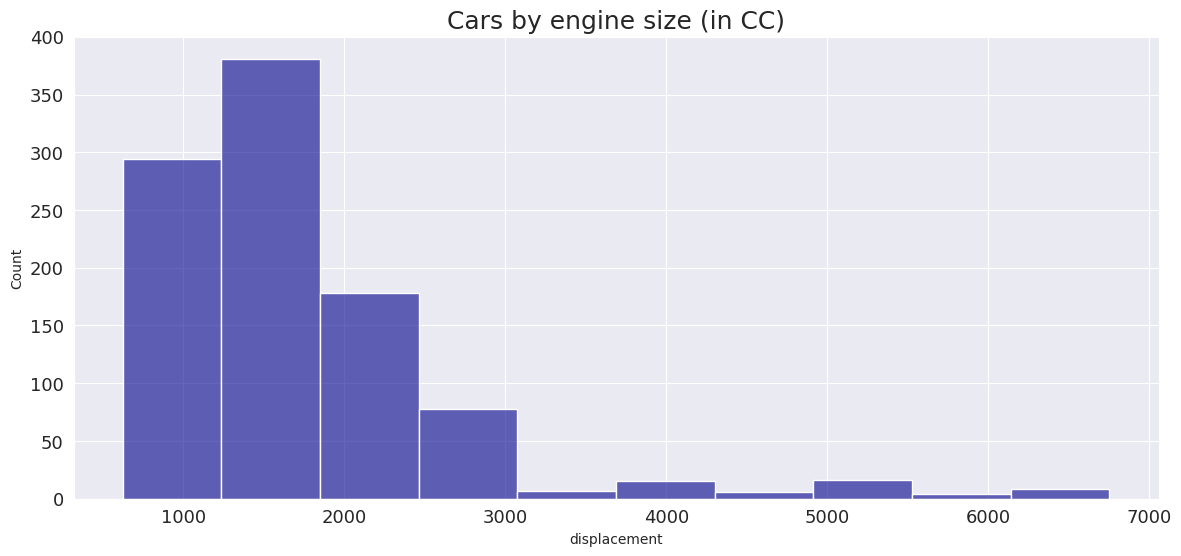

In [ ]:

plt.figure(figsize=(14,6))
sns.histplot(data=df, x='displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

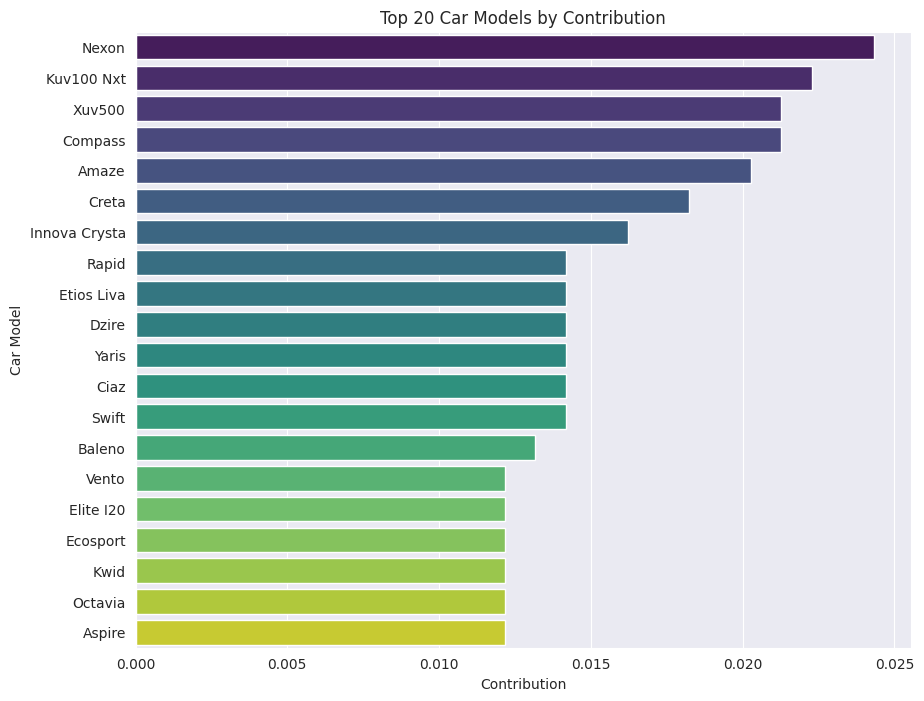

In [ ]:
# Calculate the contribution of each car model
model_contribution = df['model'].value_counts(normalize=True).reset_index()
model_contribution.columns = ['model', 'contribution']

# Sort by contribution and select the top 20 models
top_models = model_contribution.nlargest(20, 'contribution')

# Create a horizontal bar plot for the top 20 car models
plt.figure(figsize=(10, 8))
sns.barplot(x='contribution', y='model', data=top_models, palette='viridis')
plt.title('Top 20 Car Models by Contribution')
plt.xlabel('Contribution')
plt.ylabel('Car Model')
plt.show()

In [ ]:
# Check the number of unique car models in the dataset
num_unique_models = df['body_type'].nunique()
print(f'The dataset contains {num_unique_models} unique car models.')


The dataset contains 16 unique car models.


In [ ]:
# Calculate the count of each unique car model
body_type_counts = df['body_type'].value_counts().head(5)

# Create a DataFrame from the top 5 body type counts
top_body_types_df = body_type_counts.reset_index()
top_body_types_df.columns = ['Body Type', 'Count']

# Create an interactive bar chart using Plotly Express
fig = px.bar(top_body_types_df, x='Body Type', y='Count', title='Count of Top 5 Car Body Types')
fig.update_layout(xaxis_title='Body Type', yaxis_title='Count')

# Show the interactive bar chart
fig.show()

7. Box Plots:
Use box plots to identify outliers and understand the distribution of numeric variables.



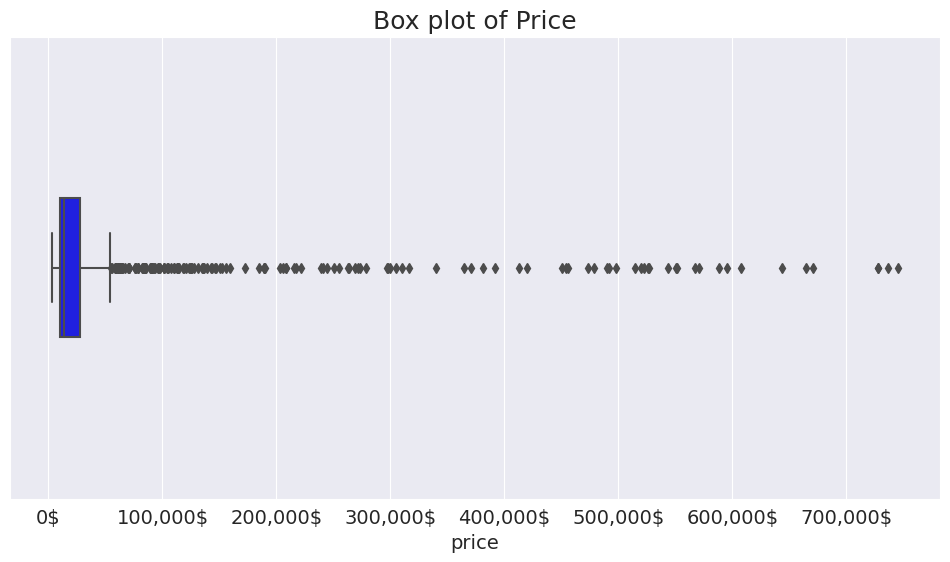

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price',width=.3,color='blue', hue= 'fuel_type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('price',fontsize=14);

In [ ]:
# Create an interactive box plot using Plotly Express
fig = px.box(df, x='fuel_type', y='price', color='fuel_type', title='Box plot of Price',
             labels={'fuel_type': 'Fuel Type', 'price': 'Price'},
             category_orders={'fuel_type': df['fuel_type'].value_counts().index.tolist()})
fig.update_layout(xaxis_title='Fuel Type', yaxis_title='Price', xaxis={'categoryorder':'total descending'})

# Show the interactive plot
fig.show()

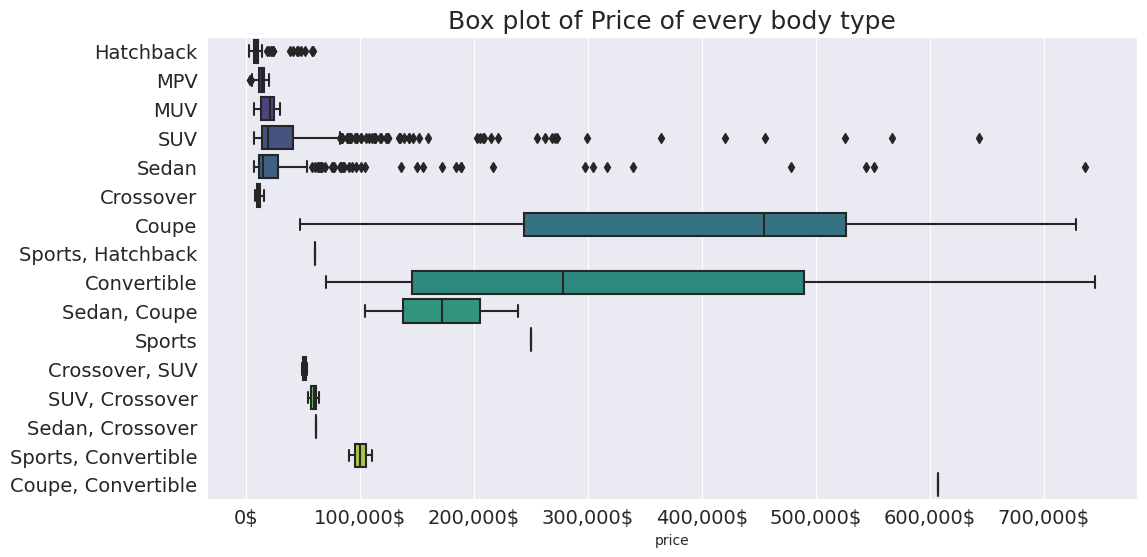

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='body_type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

In [ ]:
fig = px.box(df, x='make', y='price')
fig.update_layout(height=500, width=800, title='Box Plot of Car Prices')
fig.show()

8. Pie Charts:
Represent the contribution of different car models or manufacturers using pie charts.



Number of Unique Car Models in Dataset

In [ ]:
# Check the number of unique car models in the dataset
num_unique_models = df['model'].nunique()
print(f'The dataset contains {num_unique_models} unique car models.')


The dataset contains 196 unique car models.


Unique Car Models in the Dataset:

In [ ]:
# Get a list of all unique car models in the dataset
unique_models = df['model'].unique()

# Print the list of unique car models
print(unique_models)


['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Polo'
 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Kodiaq' 'Avanti' 'Q3' 'John Cooper Works' 'Xe'
 'Xf' 'A3 Cabriolet' 'A6' 'X3' 'S5' 'Mustang' 'Grand Cherokee'
 'M2 Competition' '718' 'Land Cruiser Prado' 'Rx 450H' '7-Series'
 'Levante' 'Granturismo' 'Quattroporte' 'Panamera' 'R8' 'Urus'
 'Continental Gt' 'Portofino' 'Bentayga' '458 Speciale' 'Mulsanne' 'Alto'
 'S-Presso' 'Celerio' 'Grand I10 Prime' 'Kuv100 Nxt' 'Swift' 'Altroz'
 'Tigor' 'Zest' 'Amaze' 'Gypsy' 'Venue' 'Nexon' 'Linea'
 'Bolero Power Plus' 'Vitara Brezza' 'I20 Active' 'Ecosport' 'Duster'
 'Verna' 'Xuv300' 'Lodgy' 'Vento' 'Brv' 'Thar' 'Gurkha' 'Xl6'
 'Tuv300 Plus' 'Ma

Top 20 Car Models by Contribution

In [ ]:
# Calculate the contribution of each car model
model_contribution = df['model'].value_counts(normalize=True).reset_index()
model_contribution.columns = ['model', 'contribution']

# Sort the dataframe by contribution (optional, for better visualization)
model_contribution = model_contribution.sort_values(by='contribution', ascending=False)

# Create a pie chart for the contribution of car models
fig = px.pie(model_contribution.head(20), values='contribution', names='model', title='Top 20 Car Models by Contribution')

# Show the interactive pie chart
fig.show()

In [ ]:
# Calculate the contribution of each car model
model_contribution = df['model'].value_counts(normalize=True).reset_index()
model_contribution.columns = ['model', 'contribution']

# Sort the dataframe by contribution (optional, for better visualization)
model_contribution = model_contribution.sort_values(by='contribution', ascending=False)

# Create a pie chart for the contribution of car models
fig = px.pie(model_contribution.tail(20), values='contribution', names='model', title='Bottom 20 Car Models by Contribution')

# Show the interactive pie chart
fig.show()

Contribution of Car Manufacturers

In [ ]:
# Calculate the contribution of each car manufacturer
manufacturer_contribution = df['make'].value_counts(normalize=True).reset_index()
manufacturer_contribution.columns = ['Manufacturer', 'Contribution',]

# Create an interactive pie chart for the contribution of car manufacturers
fig = px.pie(manufacturer_contribution, values='Contribution', names='Manufacturer', title='Contribution of Car Manufacturers')

# Show the interactive pie chart
fig.show()

**Bivariate Analysis:**

1. Correlation Matrix:
Create a correlation matrix to understand the relationships between numeric variables.


In [ ]:
numeric_columns = df.select_dtypes(include=['number'])


In [ ]:
correlation_matrix = numeric_columns.corr()


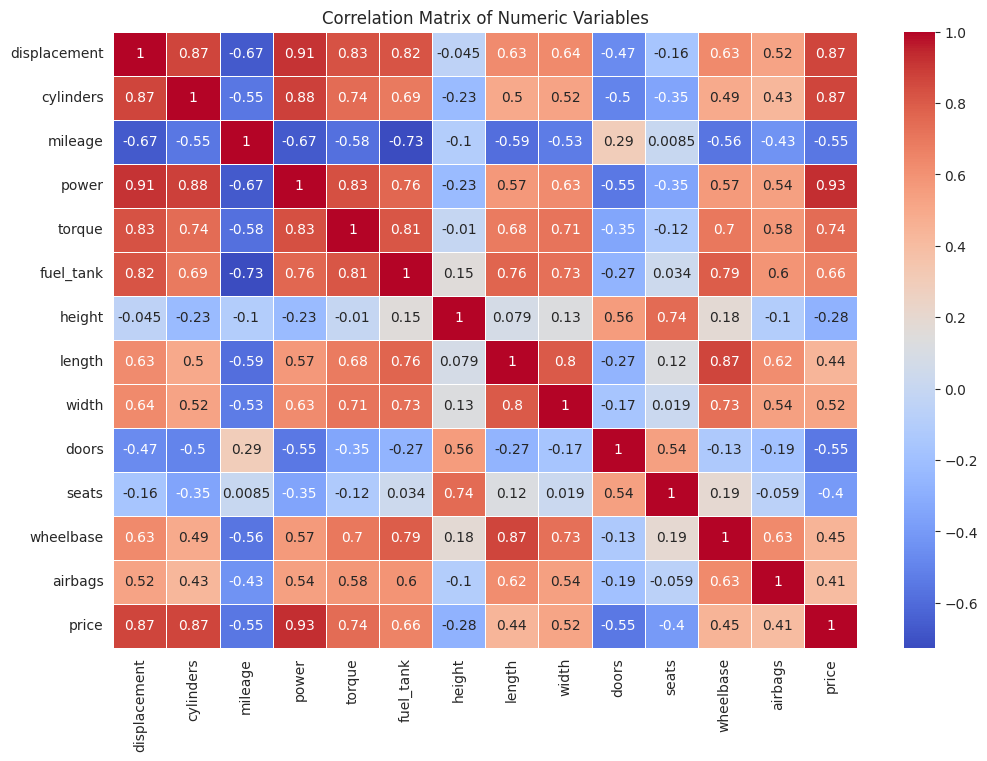

In [ ]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


2. Scatter Plots:
Plot scatter plots to explore the relationship between two numeric variables (e.g., sales vs. price).


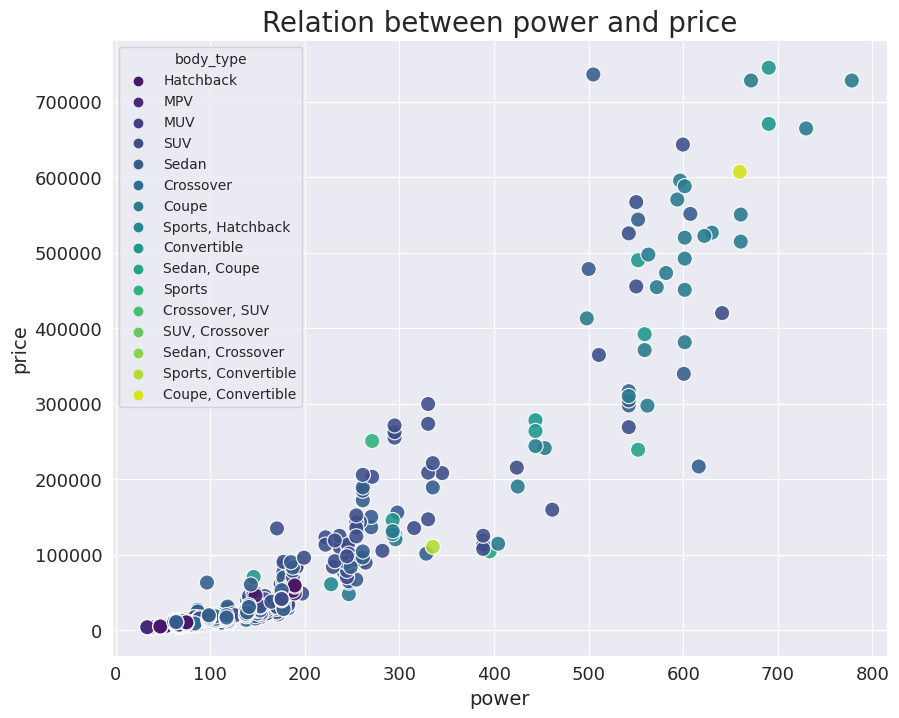

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='power', y='price',hue='body_type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);

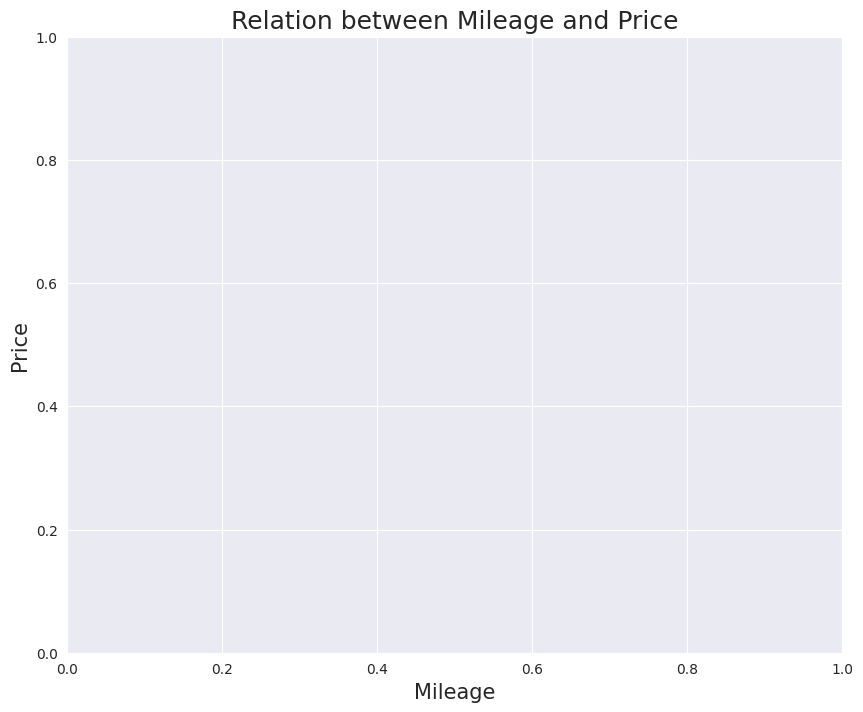

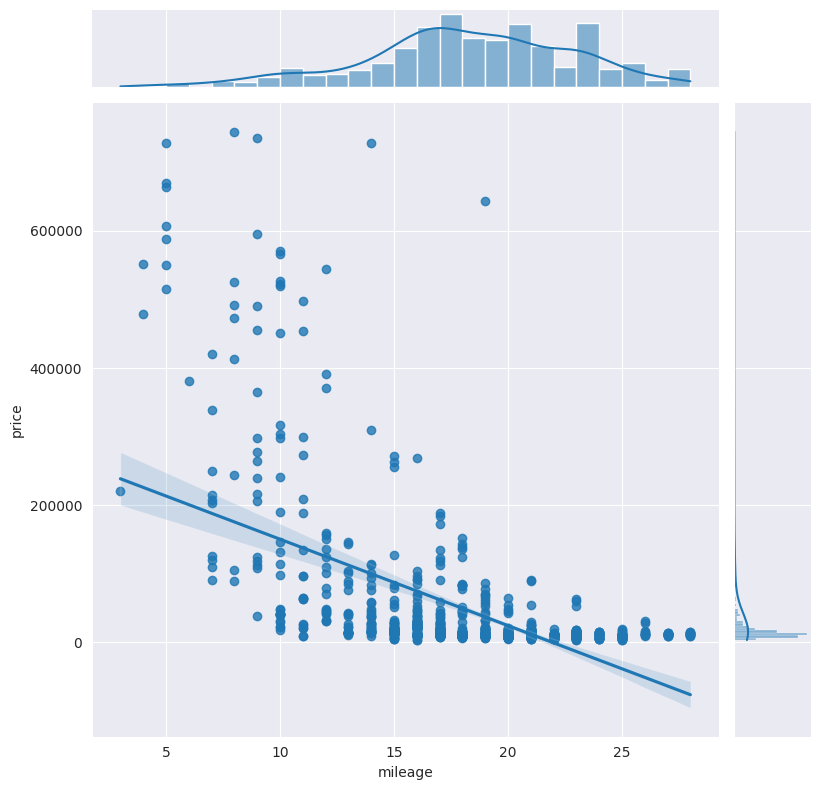

In [ ]:
 #Create a figure and an axis (subplot) within that figure
fig, ax = plt.subplots(figsize=(10, 8))

# Use the axis (ax) to create the jointplot
sns.jointplot(data=df, x='mileage', y='price', kind='reg', ax=ax, palette='viridis', height=8, ratio=7)

# Add a title to the axis (ax)
ax.set_title('Relation between Mileage and Price', fontsize=18)

# Set labels for x and y axes
ax.set_xlabel('Mileage', fontsize=15)
ax.set_ylabel('Price', fontsize=15)

# Show the plot
plt.show()

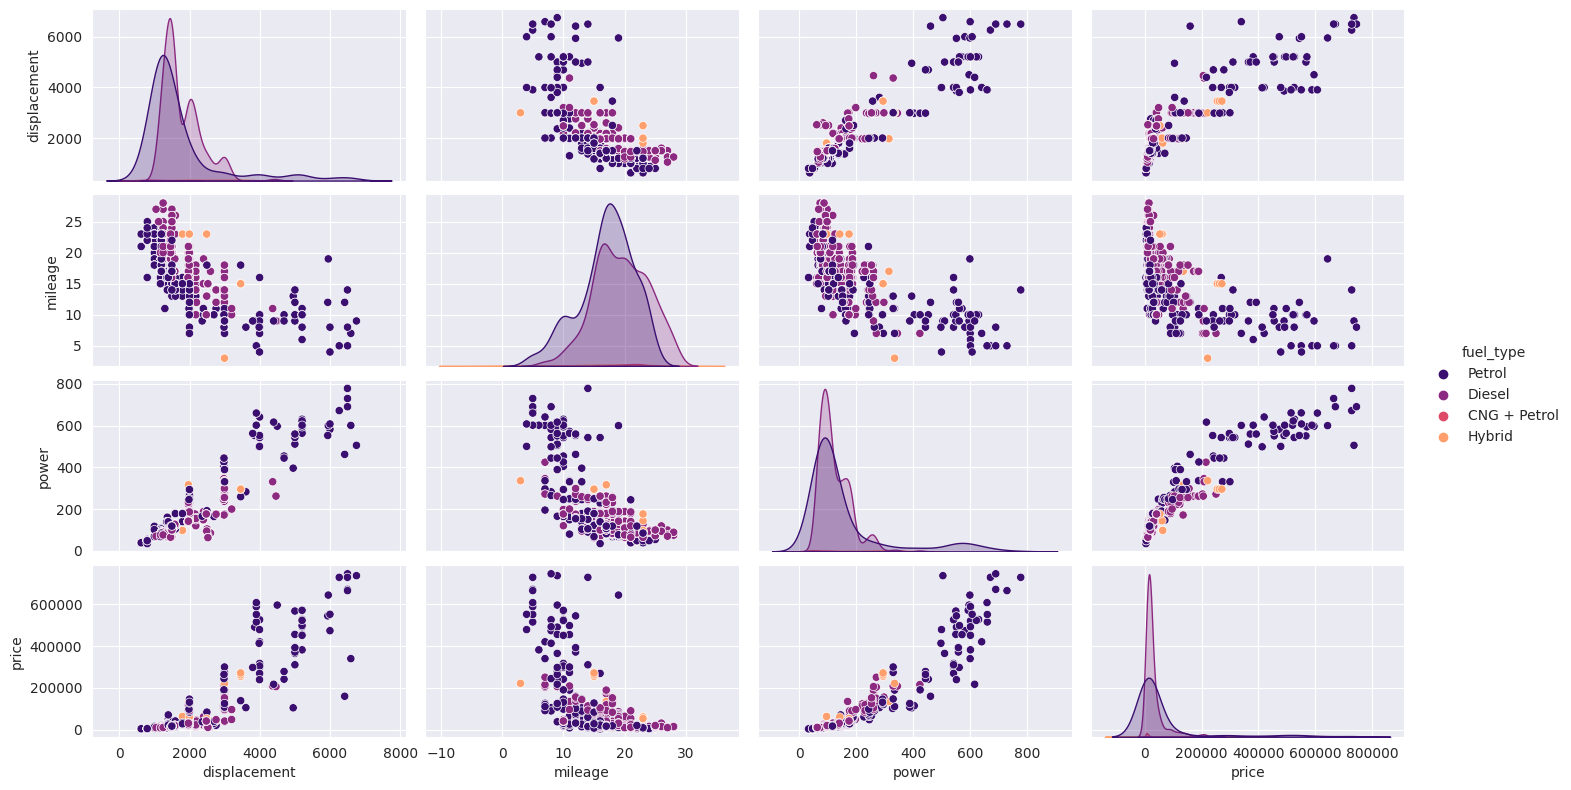

In [ ]:
sns.pairplot(df,vars=[ 'displacement', 'mileage', 'power', 'price'], hue= 'fuel_type',
             palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2, aspect=1.8);

In [ ]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

3. Pair Plots:
Use pair plots for a quick overview of relationships between multiple numeric variables.


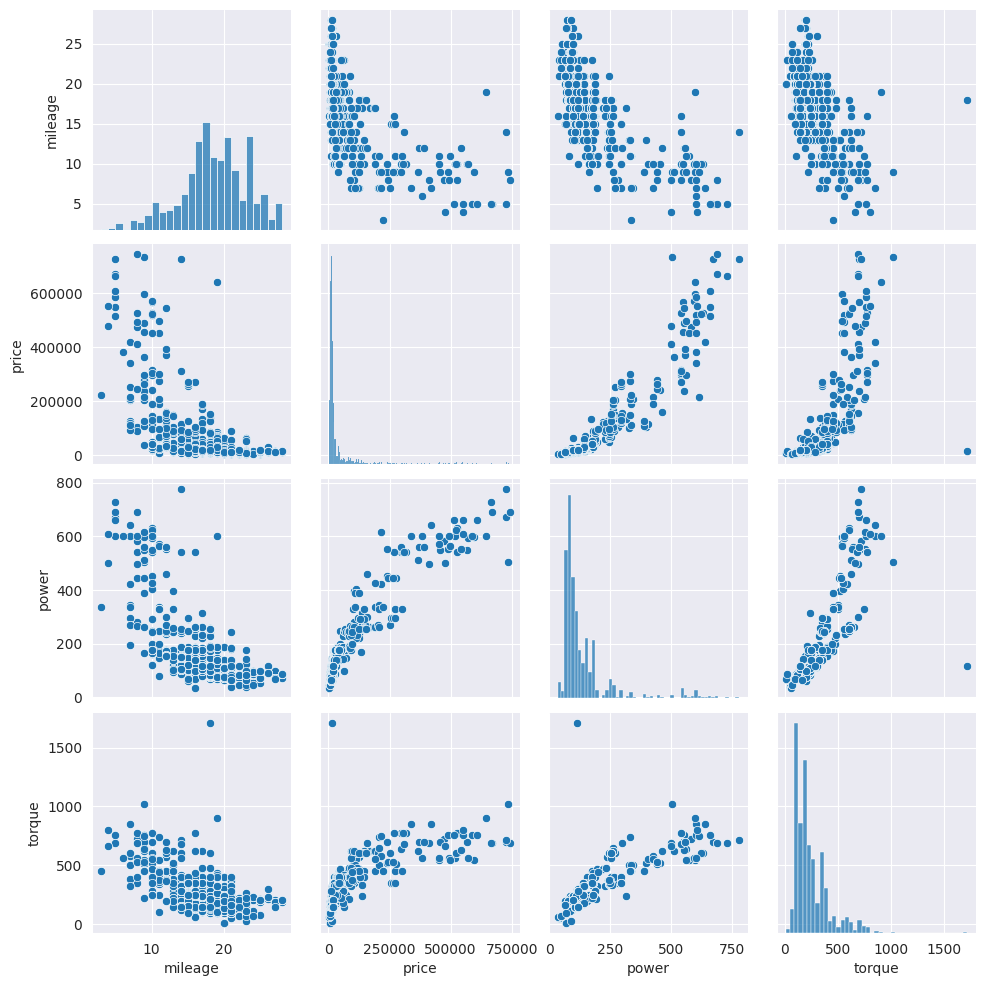

In [ ]:
# Select the numeric columns you want to include in the pair plot
numeric_columns = ['mileage', 'price', 'power', 'torque']

# Create a pair plot
sns.pairplot(df[numeric_columns])

# Show the plot
plt.show()

4. Bar Charts with Hue:
Enhance bar charts by introducing the 'hue' parameter to represent additional categorical variables.


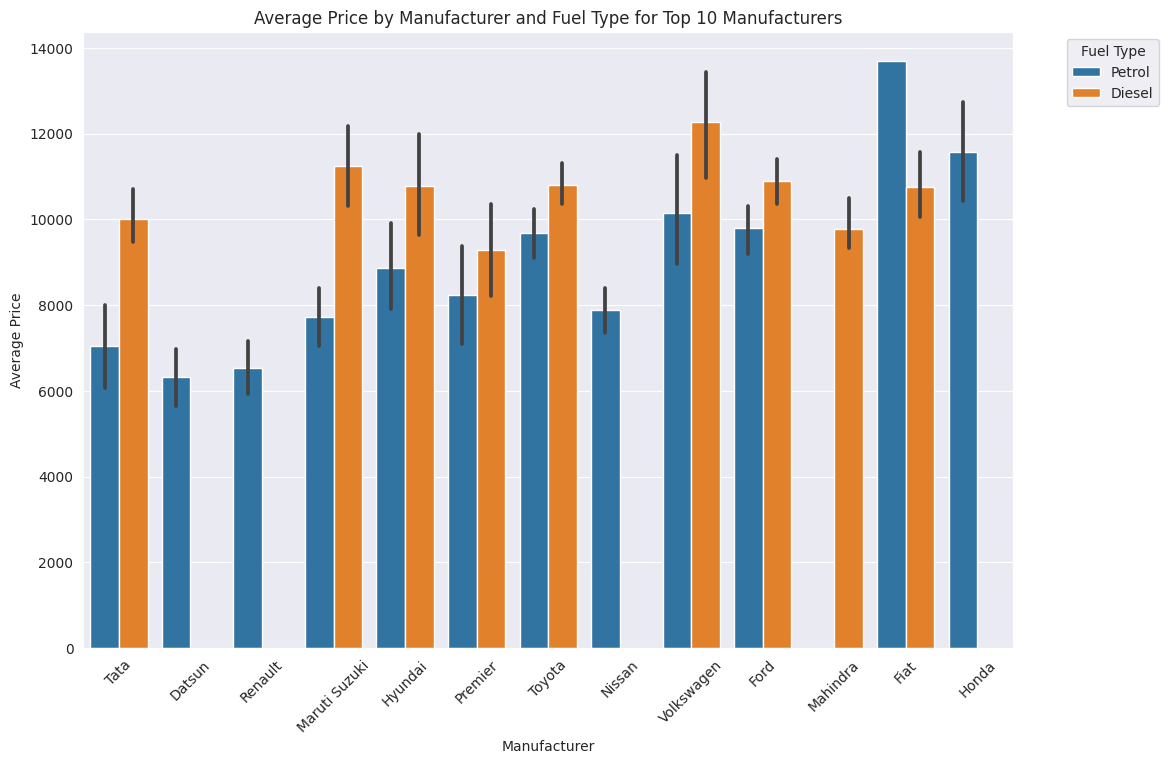

In [ ]:

# Create a bar chart with hue
plt.figure(figsize=(12, 8))
sns.barplot(data=df.head(200), x='make', y='price', hue='fuel_type')
plt.title('Average Price by Manufacturer and Fuel Type for Top 10 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

5. Heatmaps:
Utilize heatmaps to visually represent the correlation matrix for better insights.


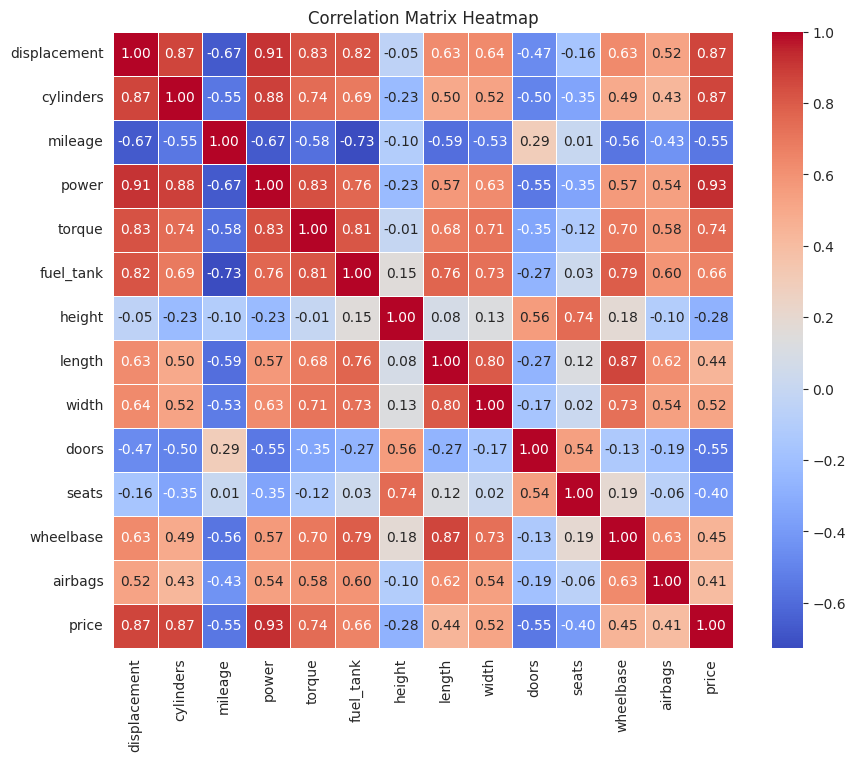

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

7. Box Plots with Hue:
Enhance box plots by introducing the 'hue' parameter to represent additional categorical variables.


In [ ]:
# Create an interactive box plot using Plotly Express
fig = px.box(df.head(100), x='make', y='price', color='fuel_type', title='Box plot of Price',
             labels={'fuel_type': 'Fuel Type', 'price': 'Price'},
             category_orders={'fuel_type': df['fuel_type'].value_counts().index.tolist()})
fig.update_layout(xaxis_title='Fuel Type', yaxis_title='Price', xaxis={'categoryorder':'total descending'})

# Show the interactive plot
fig.show()

9. Violin Plots:
Visualize the distribution of numeric variables across different categories using violin plots.


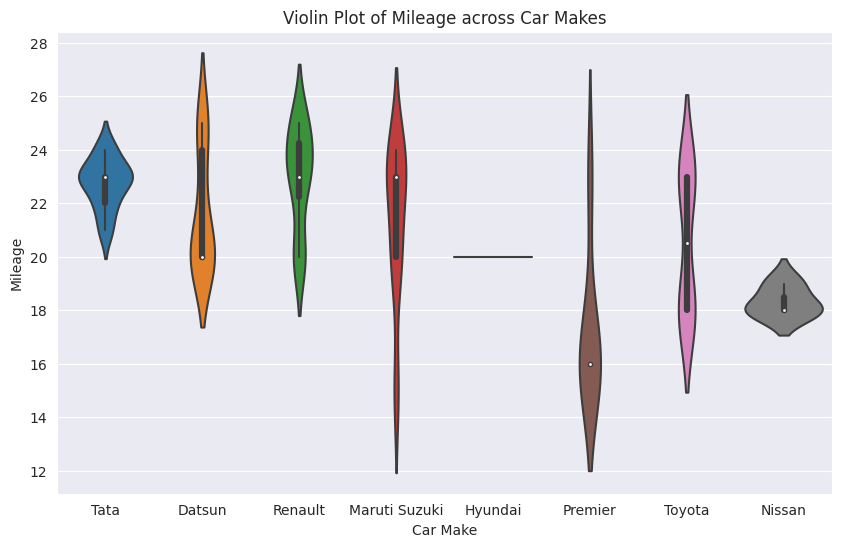

In [ ]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df.head(100), x='make', y='mileage')
plt.title('Violin Plot of Mileage across Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Mileage')
plt.show()

10. Stacked Bar Charts:
Represent the combined contribution of different categories using stacked bar charts.


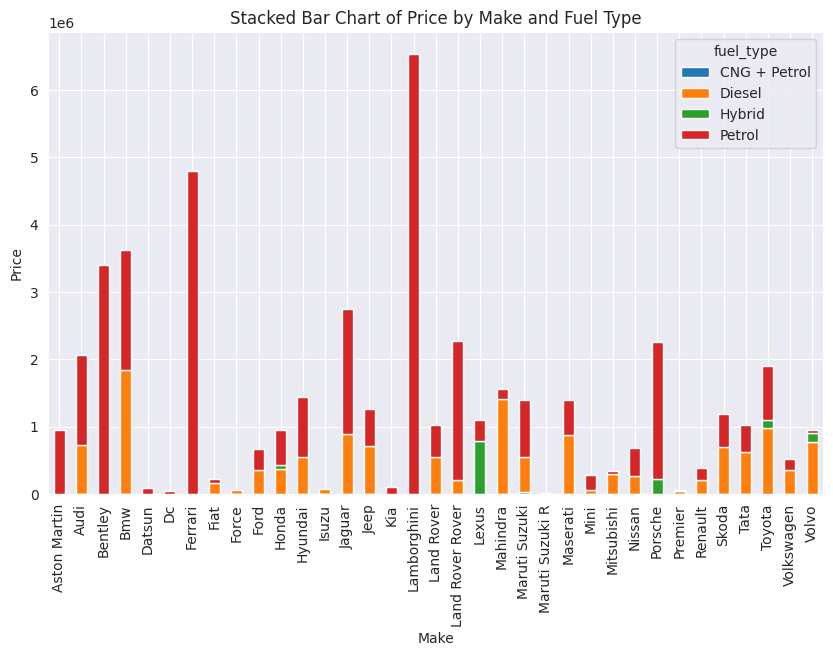

In [ ]:
# Group by 'make' and 'fuel_type', then sum the 'price' for each group
grouped_df = df.groupby(['make', 'fuel_type'])['price'].sum().unstack()

# Plot the stacked bar chart
grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Stacked Bar Chart of Price by Make and Fuel Type')
plt.show()